### Aprendizaje no supervisado: Clustering

**Aprendizaje Supervisado:**

En el aprendizaje supervisado, los algoritmos se entrenan utilizando un conjunto de datos que incluye **entradas** junto con **las respuestas o etiquetas correspondientes**. El objetivo principal es aprender una relación entre las entradas y las salidas conocidas para poder realizar predicciones precisas sobre nuevos datos no etiquetados. Durante el entrenamiento, el algoritmo ajusta sus parámetros para minimizar la diferencia entre las predicciones y las respuestas reales, lo que permite generalizar patrones y relaciones en los datos. Este enfoque se utiliza ampliamente en tareas como clasificación y regresión, donde se busca automatizar la asignación de etiquetas o valores a nuevas instancias basándose en la información aprendida durante el proceso de entrenamiento.

El análisis de **clustering es un método de aprendizaje no supervisado** que separa los puntos de datos en varios grupos o conjuntos específicos, de manera que los puntos de datos en el mismo grupo tienen propiedades similares y los puntos de datos en grupos diferentes tienen propiedades diferentes en algún sentido.

**Aprendizaje No Supervisado y Clustering:**

**Aprendizaje No Supervisado:**
- En el aprendizaje no supervisado, el algoritmo se enfrenta a datos sin etiquetas o respuestas previas. El objetivo es encontrar patrones, estructuras o relaciones intrínsecas en los datos sin la guía explícita de resultados conocidos.

**Clustering:**
- El clustering es una técnica común en el aprendizaje no supervisado. El objetivo es agrupar los datos en conjuntos, llamados clusters, de manera que los elementos dentro del mismo cluster sean más similares entre sí que con los elementos de otros clusters. Los puntos dentro de un cluster comparten ciertas propiedades o características comunes.

**Proceso de Clustering:**
1. **Datos sin Etiquetas:**
   - Comienza con un conjunto de datos que no tiene etiquetas o categorías predefinidas.

2. **Identificación de Patrones:**
   - El algoritmo de clustering busca patrones o estructuras en los datos basándose en alguna medida de similitud o distancia entre los puntos.

3. **Formación de Clusters:**
   - Agrupa los datos en clusters de manera que los elementos dentro de un mismo cluster sean más similares entre sí que con los elementos de otros clusters.

4. **Interpretación:**
   - Después de la formación de clusters, se analizan e interpretan los resultados. Dependiendo del contexto, los clusters pueden representar categorías, segmentos o patrones en los datos.

**Tipos de métodos de agrupamiento:**

- Agrupamiento rígido: los clústeres no se superponen (un elemento pertenece o no pertenece a un clúster), por ejemplo, K-means, K-Medoid.

- Agrupamiento suave: los clústeres pueden superponerse (fortaleza de la asociación entre clústeres e instancias), por ejemplo, modelo de mezcla (GMM) utilizando el algoritmo Expectation-Maximization.

**Tipos de Algoritmos de Clustering:**

- **K-Means:** Divide los datos en k clusters, asignando cada punto al cluster con el centroide más cercano.
  
- **Gaussian Mixture Models (GMM):** Modela los datos como una mezcla de distribuciones gaussianas, permitiendo clusters con diferentes formas y tamaños.

- **Hierarchical Clustering:** Construye una jerarquía de clusters, en la que los clusters pueden contener subclusters.

- **DBSCAN (Density-Based Spatial Clustering of Applications with Noise):** Identifica clusters basándose en la densidad de los puntos en el espacio.

**Aplicaciones:**
- El clustering se utiliza en diversas áreas, como segmentación de clientes, análisis de redes sociales, organización de documentos, reconocimiento de patrones en imágenes y más.

El aprendizaje no supervisado, especialmente el clustering, es esencial para descubrir patrones y estructuras ocultas en datos no etiquetados, lo que puede proporcionar insights valiosos y facilitar la toma de decisiones en diversas disciplinas.

### Fuentes y recursos

- https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/
- https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/
- https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/
- https://machinelearningmastery.com/discretization-transforms-for-machine-learning/
- https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm
- https://www.kaggle.com/code/vipulgandhi/kmeans-detailed-explanation/notebook
- https://www.kaggle.com/code/meetnagadia/dbscan-clustering
- https://www.kaggle.com/code/vipulgandhi/gaussian-mixture-models-clustering-explained
- https://mrinalyadav7.medium.com/dbscan-algorithm-c894701306d5

**Requisitos**

```Python
!pip install kmodes
!pip install pca
```

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("https://raw.githubusercontent.com/marsgr6/EN-online/8a1cee296279c274d8f05f3905fce97c1f7636a2/data/UX_data.csv")

data

,SUS,Time,ID,Gender,Age,Kinect,NUI,Games
0,42.5,179.3,student,M,twenty,high,average,high
1,92.5,153.3,student,M,twenty,high,high,high
2,95.0,135.7,student,M,twenty,average,average,high
3,92.5,148.3,student,F,twenty,average,high,high
4,80.0,148.0,student,M,twenty,average,average,high
5,87.5,138.7,student,M,twenty,average,high,high
6,75.0,149.3,student,M,twenty,average,average,average
7,80.0,135.3,student,M,twenty,average,high,high
8,80.0,148.0,student,M,twenty,average,high,average
9,65.0,174.7,employee,F,forty,average,high,none


### Preparación de datos

K-Means requiere variables numéricas, ya que se basa en medidas de distancia para agrupar los datos. El algoritmo utiliza la distancia euclidiana para calcular la similitud entre puntos en un espacio multidimensional. Por lo tanto, para que K-Means funcione adecuadamente, todas las variables deben ser numéricas y tener escalas comparables.

Es común aplicar técnicas de codificación para variables categóricas, como la codificación one-hot o la codificación ordinal, para convertirlas en variables numéricas antes de aplicar K-Means.

Las variables numéricas deben estar en escalas similares para evitar que el algoritmo se vea sesgado por las diferencias de magnitud entre las variables. La estandarización o normalización de las variables puede ser útil en este contexto. Esto asegura que todas las variables contribuyan de manera equitativa al proceso de agrupamiento.

La codificación de variables categóricas a numéricas es un paso esencial en el preprocesamiento de datos para muchos algoritmos de aprendizaje automático.

1. **Codificación One-Hot (Dummy Encoding):**
En esta técnica, cada categoría única de una variable categórica se convierte en una nueva columna binaria (0 o 1) y se asigna un valor de 1 a la columna correspondiente a la categoría de la observación y 0 en las demás columnas. Esto crea una representación binaria distintiva para cada categoría.

- Por ejemplo una columna `Color` que contenga tres valores únicos `{'Rojo', 'Verde', 'Azul'}`

|    | Color   |
|---:|:--------|
|  0 | Rojo    |
|  1 | Verde   |
|  2 | Azul    |
|  3 | Rojo    |
|  4 | Verde   |

- Resultaría en:

|    |   Color_Azul |   Color_Rojo |   Color_Verde |
|---:|-------------:|-------------:|--------------:|
|  0 |            0 |            1 |             0 |
|  1 |            0 |            0 |             1 |
|  2 |            1 |            0 |             0 |
|  3 |            0 |            1 |             0 |
|  4 |            0 |            0 |             1 |

2. **Codificación Ordinal:**

Si las categorías tienen un orden inherente, puedes asignarles valores numéricos de manera ordinal. Esto es adecuado cuando hay una relación ordinal real entre las categorías.

- Es posible asignar manualmente valores numéricos o utilizar la función `map` en pandas.

|    | Color   |   Color_Ordinal |
|---:|:--------|----------------:|
|  0 | Rojo    |               1 |
|  1 | Verde   |               2 |
|  2 | Azul    |               3 |
|  3 | Rojo    |               1 |
|  4 | Verde   |               2 |

- Utilizaremos codificación ordinal para nuestras variables.

In [ ]:
encoded_data = data.copy()

In [ ]:
gender_mapping = {v: i for i,v in enumerate(data.Gender.unique())}
gender_mapping

{'M': 0, 'F': 1}

In [ ]:
encoded_data.Gender = encoded_data.Gender.map(gender_mapping)
encoded_data

,SUS,Time,ID,Gender,Age,Kinect,NUI,Games
0,42.5,179.3,student,0,twenty,high,average,high
1,92.5,153.3,student,0,twenty,high,high,high
2,95.0,135.7,student,0,twenty,average,average,high
3,92.5,148.3,student,1,twenty,average,high,high
4,80.0,148.0,student,0,twenty,average,average,high
5,87.5,138.7,student,0,twenty,average,high,high
6,75.0,149.3,student,0,twenty,average,average,average
7,80.0,135.3,student,0,twenty,average,high,high
8,80.0,148.0,student,0,twenty,average,high,average
9,65.0,174.7,employee,1,forty,average,high,none


In [ ]:
age_mapping = {v: 10+10*(i+1) for i,v in enumerate(data.Age.unique())}
print(age_mapping)

encoded_data.Age = encoded_data.Age.map(age_mapping)
encoded_data

{'twenty': 20, 'forty': 30, 'thirty': 40}


,SUS,Time,ID,Gender,Age,Kinect,NUI,Games
0,42.5,179.3,student,0,20,high,average,high
1,92.5,153.3,student,0,20,high,high,high
2,95.0,135.7,student,0,20,average,average,high
3,92.5,148.3,student,1,20,average,high,high
4,80.0,148.0,student,0,20,average,average,high
5,87.5,138.7,student,0,20,average,high,high
6,75.0,149.3,student,0,20,average,average,average
7,80.0,135.3,student,0,20,average,high,high
8,80.0,148.0,student,0,20,average,high,average
9,65.0,174.7,employee,1,30,average,high,none


También podemos usar la función `replace` para la codificación de variables categóricas. Aquí hay una explicación línea por línea del código en la celda siguiente:

1. `kinect_response = {v: 2-i for i,v in enumerate(data.Kinect.unique())}`:
   - Se está creando un diccionario llamado `kinect_response`.
   - `data.Kinect.unique()` devuelve los valores únicos en la columna 'Kinect' del DataFrame `data`.
   - `enumerate(data.Kinect.unique())` genera índices (`i`) y valores (`v`) para cada elemento único en 'Kinect'.
   - `{v: 2-i for i,v in enumerate(data.Kinect.unique())}` crea un diccionario donde las claves son los valores únicos de 'Kinect' y los valores asociados son 2 menos el índice de ese valor único.
   - Esto es parte de un proceso de codificación ordinal, depende el orden presente en el dataframe, no siempre es posible esta automatización.

2. `print(kinect_response)`:
   - Imprime el diccionario `kinect_response` para mostrar la relación entre los valores únicos de 'Kinect' y sus respectivos valores codificados.

3. `col_r = ['Kinect', 'NUI', 'Games']`:
   - Se crea una lista llamada `col_r` que contiene las columnas ('Kinect', 'NUI', 'Games') que se utilizarán para reemplazar valores en el DataFrame.

4. `[encoded_data.replace({col: kinect_response}, inplace=True) for col in col_r];`:
   - Se realiza un bucle a través de cada columna especificada en `col_r`.
   - `encoded_data.replace({col: kinect_response}, inplace=True)` reemplaza los valores en la columna `col` del DataFrame `encoded_data` utilizando el diccionario `kinect_response`.
   - El parámetro `inplace=True` modifica directamente el DataFrame `encoded_data` sin necesidad de asignar el resultado a una nueva variable.
   - El uso de corchetes `[...]` indica que se está utilizando una comprensión de lista, pero aquí no se está utilizando la lista resultante, solo se está aplicando la operación en su lugar.

En resumen, este código está creando un diccionario para codificar valores únicos de la columna 'Kinect' de un DataFrame y luego aplica esta codificación a las columnas especificadas en `col_r` en el DataFrame `encoded_data`.

In [ ]:
kinect_response = {v: 2-i for i,v in enumerate(data.Kinect.unique())}
print(kinect_response)

col_r = ['Kinect', 'NUI', 'Games']  # column to replace values

[encoded_data.replace({col: kinect_response}, inplace=True) for col in col_r];

ID_response = {v: i for i,v in enumerate(data.ID.unique())}
print(ID_response)

col_r = ['ID']  # column to replace values

[encoded_data.replace({col: ID_response}, inplace=True) for col in col_r];

encoded_data

{'high': 2, 'average': 1, 'none': 0}
{'student': 0, 'employee': 1}


,SUS,Time,ID,Gender,Age,Kinect,NUI,Games
0,42.5,179.3,0,0,20,2,1,2
1,92.5,153.3,0,0,20,2,2,2
2,95.0,135.7,0,0,20,1,1,2
3,92.5,148.3,0,1,20,1,2,2
4,80.0,148.0,0,0,20,1,1,2
5,87.5,138.7,0,0,20,1,2,2
6,75.0,149.3,0,0,20,1,1,1
7,80.0,135.3,0,0,20,1,2,2
8,80.0,148.0,0,0,20,1,2,1
9,65.0,174.7,1,1,30,1,2,0


Hemos realizado un ordinal encoding

- Obtendriámos el mismo resultado del `replace` usando el `OrdinalEncoder` implementado en `sklearn.preprocessing`

- Se muestra a continuación un ejemplo para la columna `Game`:

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[['none','average','high']])

print(encoder.fit_transform(np.array(data.Games).reshape(-1, 1)).flatten().astype('int'))

[2 2 2 2 2 2 1 2 1 0 1 1 2 1 0 1 1 1 1 0 2 1 1 1 0 1 0 1 0 1]


Una vez que todas nuestras columnas son numéricas, vamos a escalar los datos para nuestro análisis de clustering.

### Estandarización o Escalado Estándar

Estandarizar las variables en un análisis de clustering, como el algoritmo K-Means, es importante por varias razones:

1. **Sensibilidad a la Escala:**
   - Los algoritmos de clustering, especialmente aquellos basados en medidas de distancia, pueden ser sensibles a las diferencias de escala entre las variables. Si las variables tienen rangos muy diferentes, el algoritmo puede dar más peso a las variables con mayores magnitudes, afectando la calidad de la agrupación.

2. **Consistencia en la Interpretación:**
   - La estandarización asegura que todas las variables tengan la misma escala, lo que facilita la interpretación y comparación de las contribuciones de cada variable a la formación de clusters. Sin estandarización, la interpretación de los clusters podría verse distorsionada por las diferencias de escala.

3. **Equilibrio en la Contribución de las Variables:**
   - Al estandarizar, todas las variables contribuyen de manera equitativa al proceso de clustering, independientemente de sus unidades o magnitudes originales. Esto es esencial para evitar que una variable domine la formación de clusters debido a su escala relativa.

4. **Mejora de la Convergencia:**
   - Al estandarizar, se puede mejorar la convergencia del algoritmo K-Means. La estandarización ayuda a que el algoritmo no se vea influenciado en exceso por variables con escalas más grandes, lo que podría afectar la convergencia y la interpretación de los clusters.

5. **Asegurar la Homogeneidad de los Clusters:**
   - La estandarización contribuye a que los clusters sean más homogéneos en términos de variabilidad de las variables. Si las variables no están estandarizadas, algunos clusters pueden formarse principalmente debido a variables con mayores varianzas, lo que no reflejaría necesariamente similitudes en términos de patrones reales en los datos.

En resumen, estandarizar las variables en un análisis de clustering es una práctica común para garantizar la robustez, equidad y consistencia en la formación de clusters, especialmente en algoritmos sensibles a la escala como K-Means.

### Proceso de estandarización

Dada una variable $X$ con $n$ observaciones, la estandarización transforma cada valor $x_i$ de la variable en un valor $z_i$ mediante la siguiente fórmula:

$$ z_i = \frac{x_i - \bar{X}}{s} $$

Donde:
- $ \bar{X} $ es la media de la variable $X$.
- $ s $ es la desviación estándar de la variable $X$.

El resultado de esta transformación es una nueva variable $Z$, donde $z_i$ representa la distancia relativa de $x_i$ respecto a la media en términos de desviaciones estándar. La nueva variable $Z$ tiene una media de cero y una desviación estándar de uno, lo que facilita la comparación y el análisis de las observaciones en un contexto estadístico o de aprendizaje automático. Este proceso es esencial cuando se trabaja con algoritmos sensibles a la escala, garantizando que las variables contribuyan de manera equitativa al análisis o modelado.

In [ ]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(encoded_data)

### K-Means

1. **Inicialización:** Selecciona aleatoriamente k centroides iniciales, uno para cada cluster.
   - Dado un conjunto de datos $X$ con $n$ puntos y el número deseado de clusters $k$, se eligen $k$ centroides iniciales $C = \{c_1, c_2, ..., c_k\}$ de manera aleatoria o mediante algún método específico.

2. **Asignación de Puntos a Clusters:** Cada punto de datos se asigna al cluster cuyo centroide está más cerca en términos de distancia euclidiana.
   - Cada punto $x_i$ se asigna al cluster $j$ cuyo centroide $c_j$ es el más cercano, utilizando la distancia euclidiana $d(x_i, c_j)$.

   $$ j = \arg\min_{j} d(x_i, c_j) $$

3. **Actualización de Centroides:** Se recalcula el centroide de cada cluster utilizando la media de los puntos asignados a ese cluster.
   - Se actualiza cada centroide $c_j$ como el promedio de los puntos asignados a ese cluster.

   $$ c_j = \frac{1}{|S_j|} \sum_{x_i \in S_j} x_i $$
   donde $S_j$ es el conjunto de puntos asignados al cluster $j$.

4. **Iteración:** Se repiten los pasos 2 y 3 hasta que la asignación de puntos a clusters ya no cambia significativamente o se alcanza un número predefinido de iteraciones.
   - Se repiten los pasos 2 y 3 hasta que la asignación de puntos a clusters ya no cambia significativamente o se alcanza un número máximo de iteraciones.

El resultado final es una partición de los datos en $k$ clusters, representados por sus centroides. El objetivo es minimizar la suma de las distancias cuadradas entre los puntos y sus centroides respectivos. La función objetivo $J$ se define como:

$$ J = \sum_{i=1}^{n} \sum_{j=1}^{k} w_{ij} \cdot d(x_i, c_j)^2 $$

donde $w_{ij}$ es una variable indicadora que toma el valor 1 si $x_i$ está asignado al cluster $j$ y 0 en caso contrario.

El resultado final es una partición de los datos en $k$ clusters, con cada cluster representado por su centroide. K-Means es eficiente y escalable, pero su rendimiento puede depender de la elección inicial de centroides y es sensible a la presencia de outliers en los datos. Además, el usuario debe especificar el valor de $k$ de antemano, lo que puede requerir cierto conocimiento del dominio o pruebas iterativas para encontrar la cantidad óptima de clusters.

**La fórmula general para la distancia euclidiana** en un espacio de $n$ se define a continuación:

Para dos puntos $ P = (p_1, p_2, \ldots, p_n) $ y $ Q = (q_1, q_2, \ldots, q_n) $, la distancia euclidiana $ d $ se define como:

$$ d(P, Q) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2} $$

En otras palabras, la distancia euclidiana entre dos puntos es la raíz cuadrada de la suma de los cuadrados de las diferencias entre las coordenadas correspondientes. Esta medida es ampliamente utilizada en diversas disciplinas, como estadísticas, aprendizaje automático y geometría, para cuantificar la proximidad o similitud entre puntos en un espacio multidimensional.

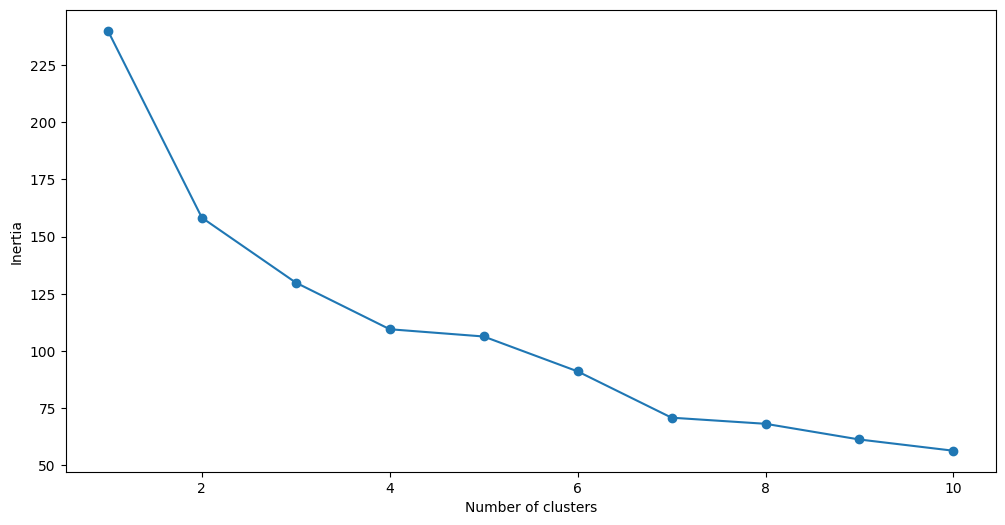

In [ ]:
from sklearn.cluster import KMeans

# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
test_clusters = 10
for cluster in range(1,test_clusters+1):
    kmeans = KMeans(n_clusters=cluster, n_init="auto")
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,test_clusters+1), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(frame.Cluster[1::2]);

### Análisis de codo

El análisis de codo (figura arriba) es una técnica utilizada en K-Means y otros algoritmos de clustering para determinar el número óptimo de clusters (k) que deberían ser utilizados en la agrupación de datos. La idea principal es observar cómo varía la suma de las distancias cuadradas intra-cluster (inertia) en función del número de clusters. La "inertia" mide cuánto se extienden los puntos dentro de cada cluster.

El análisis de codo implica realizar el siguiente procedimiento:

1. Aplicar el algoritmo K-Means para diferentes valores de k (por ejemplo, k desde 1 hasta un número máximo predefinido).
2. Para cada valor de k, calcular la suma de las distancias cuadradas intra-cluster (inertia) de todas las instancias al centroide más cercano.
3. Graficar estos valores en función de k.
4. Observar el gráfico y buscar el punto donde la disminución en la inertia se "quiebra" o disminuye más lentamente, formando una curva que se asemeja a un "codo".

La idea es que la inertia disminuirá a medida que aumentamos el número de clusters, pero la disminución será menos pronunciada después de cierto punto. El codo en el gráfico corresponde al punto donde el beneficio de añadir más clusters disminuye significativamente, y a menudo se elige como el número óptimo de clusters para el análisis.

Es importante tener en cuenta que el análisis de codo es una técnica heurística y no siempre proporciona una respuesta clara y única. Además, el número óptimo de clusters puede variar según la naturaleza de los datos y los objetivos del análisis.

- Vamos a acompañar nuestro análisis de clustering de un **Análisis de Componentes Principales** (vea el sigiuente [notebook](https://nbviewer.org/github/marsgr6/EN-online/blob/main/dimensionality_reduction.ipynb)).

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(data_scaled)

pc_transformation = pd.DataFrame(data = principalComponents,
                           columns = ['PC1', 'PC2'])

kmeans = KMeans(n_clusters=2, n_init="auto").fit(data_scaled)

pc_transformation['Cluster'] = pd.Categorical(kmeans.labels_)

<Axes: xlabel='PC1', ylabel='PC2'>

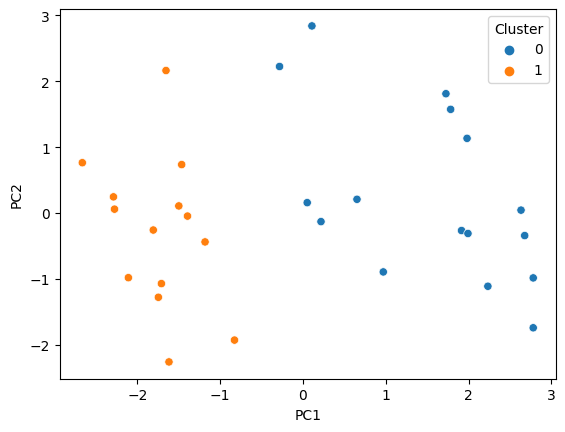

In [ ]:
import seaborn as sns

sns.scatterplot(data=pc_transformation, x="PC1", y="PC2", hue="Cluster")

In [ ]:
pca.explained_variance_ratio_.sum()

0.6000606285731005

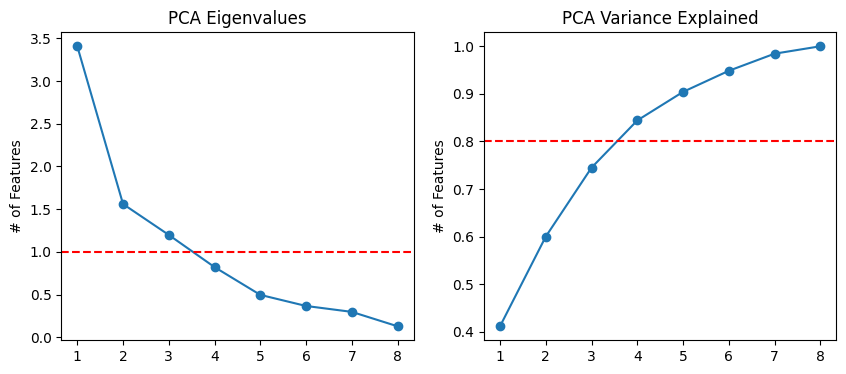

In [ ]:
pca = PCA(n_components=len(data.columns)).fit(data_scaled)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(range(1,len(data.columns)+1), pca.explained_variance_, '-o')
plt.axhline(y=1, color='r', linestyle='--')
plt.ylabel("Eigenvalues")
plt.ylabel("# of Features")
plt.title("PCA Eigenvalues")

plt.subplot(1,2,2)
plt.plot(range(1,len(data.columns)+1), pca.explained_variance_ratio_.cumsum(), '-o')
plt.axhline(y=0.80, color='r', linestyle='--')
plt.ylabel("% Variance Explained")
plt.ylabel("# of Features")
plt.title("PCA Variance Explained")
plt.show()

In [ ]:
pca = PCA(n_components=3)

principalComponents = pca.fit_transform(data_scaled)

pc_transformation = pd.DataFrame(data = principalComponents,
                           columns = ['PC1', 'PC2', 'PC3'])

pc_transformation['Cluster'] = pd.Categorical(kmeans.labels_)

In [ ]:
import plotly.express as px

fig = px.scatter_3d(pc_transformation, x='PC1', y='PC2', z='PC3',
              color='Cluster')
fig.show()

### K-modes

El algoritmo k-modes está diseñado específicamente para manejar datos categóricos. A diferencia del algoritmo k-means, que trabaja con variables numéricas, el k-modes se utiliza para clustering en conjuntos de datos que contienen variables categóricas.

El k-modes se basa en la idea de encontrar modas (valores más frecuentes) en lugar de centroides como en k-means. El objetivo del k-modes es agrupar instancias que sean similares en términos de sus características categóricas, utilizando una medida de distancia basada en la cantidad de coincidencias o desacuerdos en las categorías.

Cuando se aplican métodos de clustering a datos categóricos, es importante utilizar algoritmos diseñados para manejar esa naturaleza específica de los datos. K-modes es una extensión natural de k-means que se adapta bien a variables categóricas y es una opción común en situaciones donde se trabaja principalmente con atributos discretos o categóricos.

### K-Modes: Algoritmo

1. **Inicialización de Centroides:**
   - Dados $k$ clusters a formar, se seleccionan $k$ modas iniciales $M_1, M_2, ..., M_k$ como centroides.

2. **Asignación de Instancias:**
   - Dada una instancia $X_i$ con características categóricas $C_{i1}, C_{i2}, ..., C_{ip}$, se asigna a la clase $j$ cuyo centroide $M_j$ minimiza la distancia de coincidencias o desacuerdos en categorías.
   - La distancia $d(X_i, M_j)$ se mide por la cantidad de categorías en las que $X_i$ y $M_j$ difieren.

3. **Actualización de Centroides:**
   - Para cada cluster $j$, se actualiza el centroide $M_j$ como la moda (valor más frecuente) en cada categoría entre las instancias asignadas al cluster.

4. **Función Objetivo:**
   - No hay una función objetivo global como en K-Means, pero el objetivo es minimizar la distancia categórica entre instancias y centroides dentro de cada cluster.

5. **Iteración:**
   - Se repiten los pasos de asignación y actualización hasta que la asignación de instancias a clusters ya no cambia significativamente.

K-Modes es un algoritmo que adapta la noción de modas y medidas de distancia específicas para datos categóricos, buscando agrupar instancias similares en términos de sus características categóricas.

En el algoritmo K-Modes, la distancia entre dos instancias $X_i$ y $M_j$ se mide utilizando la distancia de coincidencias o desacuerdos en categorías. Dado que estamos tratando con variables categóricas, la distancia categórica es una medida que cuantifica la discrepancia entre las categorías de dos puntos.

Sea $C_{ik}$ la categoría de la característica $k$ en la instancia $X_i$ y $M_{jk}$ la categoría correspondiente en el centroide $M_j$, la distancia categórica entre $X_i$ y $M_j$ se puede definir como:

$$ d(X_i, M_j) = \sum_{k=1}^{p} \delta(C_{ik}, M_{jk}) $$

donde:
- $p$ es el número de características categóricas en cada instancia.
- $\delta(C_{ik}, M_{jk})$ es una función delta de Kronecker que devuelve 0 si $C_{ik}$ es igual a $M_{jk}$ y 1 en caso contrario.

La distancia categórica simplemente suma 1 por cada categoría en la que las dos instancias difieren. En otras palabras, mide la cantidad de categorías en las que $X_i$ y $M_j$ no coinciden.

El objetivo del algoritmo K-Modes es minimizar esta distancia categórica en el proceso de asignación y actualización de centroides para formar clusters coherentes en términos de características categóricas.

### Discretización de nuestras variables numéricas `Time`y `SUS`

`KBinsDiscretizer` es una clase proporcionada por la biblioteca scikit-learn en Python, diseñada para discretizar (dividir en bins o intervalos) características numéricas en conjuntos de datos. Este proceso es útil cuando se desea convertir variables continuas en categorías discretas. La discretización puede ser beneficiosa en ciertos casos, como cuando se trabaja con algoritmos que requieren características categóricas o cuando se busca manejar la multicolinealidad en modelos lineales.

Aquí hay una explicación de los principales aspectos de `KBinsDiscretizer`:

- Uso Básico:

En este ejemplo:
- `n_bins` especifica el número de bins o intervalos que deseamos crear.
- `encode` determina cómo se codificarán las etiquetas (ordinal, onehot o onehot-dense).
- `strategy` indica la estrategia para definir los bins ('uniform', 'quantile', o 'kmeans').

- Parámetros Principales:

- **n_bins:** Número de bins (intervalos) a generar.
- **encode:** Método para codificar las etiquetas de los bins. Puede ser 'ordinal', 'onehot', o 'onehot-dense'.
- **strategy:** Estrategia para definir los bins. 'uniform' crea bins de igual ancho, 'quantile' crea bins con la misma cantidad de puntos, y 'kmeans' usa k-means clustering para definir los bins.

- Atributos Importantes:

  - **bin_edges_:** Los límites de los bins después de ajustar el transformador.

- Uso de las Etiquetas:

- Si `encode` es 'ordinal', las etiquetas son valores enteros.
- Si `encode` es 'onehot' o 'onehot-dense', las etiquetas son matrices binarias indicando la pertenencia a cada bin.

`KBinsDiscretizer` es útil cuando se necesita discretizar características numéricas en bins para adaptarse mejor a ciertos modelos o para abordar problemas específicos en el análisis de datos.

En el fragmento de código en la celda siguiente, está creando un objeto `KBinsDiscretizer` con ciertos parámetros específicos. Aquí está la explicación de esos parámetros:

```python
from sklearn.preprocessing import KBinsDiscretizer

# Crear el transformador KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans', subsample=None)
```

- **`n_bins=3`:** Indica que se crearán 3 bins o intervalos para discretizar las características numéricas.

- **`encode='ordinal'`:** Las etiquetas de los bins se codificarán como valores enteros. En otras palabras, después de aplicar la discretización, cada valor numérico se asignará a un bin específico representado por un valor entero.

- **`strategy='kmeans'`:** Esta opción indica que la estrategia para definir los bins se basará en el algoritmo K-Means clustering. K-Means se utilizará para identificar los límites óptimos de los bins.

- **`subsample=None`:** Este parámetro determina si se debe realizar un submuestreo (subsampleo) de los datos antes de aplicar la discretización. En este caso, se establece en `None`, lo que significa que no se realizará submuestreo.

`KBinsDiscretizer` se utilizó para discretizar las características numéricas en 3 bins utilizando el algoritmo K-Means para definir los límites de los bins, y las etiquetas de los bins se representarán como valores enteros. Este proceso puede ser útil en situaciones donde se desea convertir características numéricas en categorías discretas utilizando la técnica de K-Means.

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans', subsample=None)
data_disc = data.copy()

data_disc[['SUS', 'Time']] = discretizer.fit_transform(data[data.columns[:2]]).astype('int')

bin_response = {i: v for i,v in enumerate(['low', 'medium', 'high'])}
print(bin_response)

col_r = ['SUS', 'Time']  # column to replace values

[data_disc.replace({col: bin_response}, inplace=True) for col in col_r];

data_disc

{0: 'low', 1: 'medium', 2: 'high'}


,SUS,Time,ID,Gender,Age,Kinect,NUI,Games
0,low,high,student,M,twenty,high,average,high
1,high,medium,student,M,twenty,high,high,high
2,high,low,student,M,twenty,average,average,high
3,high,medium,student,F,twenty,average,high,high
4,high,medium,student,M,twenty,average,average,high
5,high,medium,student,M,twenty,average,high,high
6,medium,medium,student,M,twenty,average,average,average
7,high,low,student,M,twenty,average,high,high
8,high,medium,student,M,twenty,average,high,average
9,medium,high,employee,F,forty,average,high,none


**Visualizamos el resultado de la discretización**

<Axes: xlabel='SUS', ylabel='Time'>

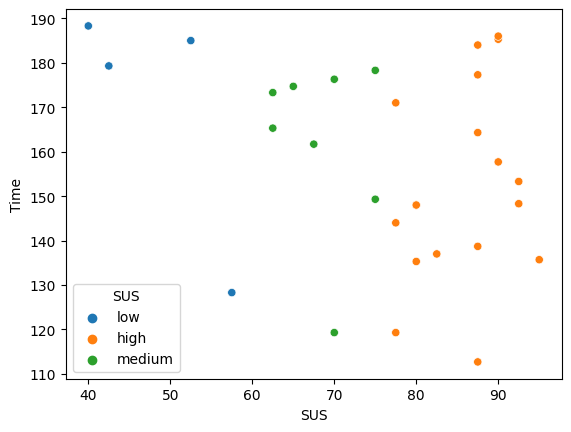

In [ ]:
sns.scatterplot(data=data, x="SUS", y="Time", hue=data_disc.SUS)

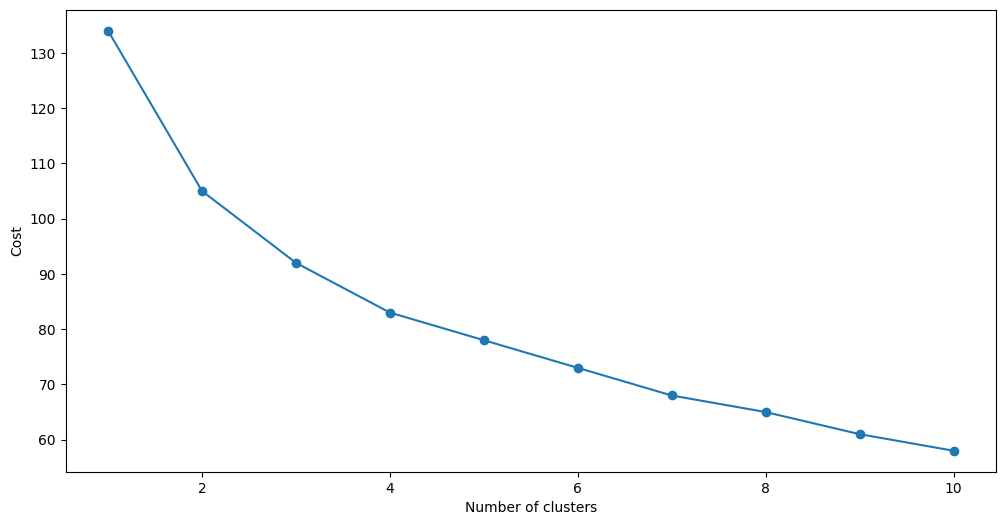

In [ ]:
from kmodes.kmodes import KModes

# Elbow curve to find optimal K
cost = []
test_clusters = 10

for num_clusters in range(1, test_clusters+1):
    kmodes = KModes(n_clusters=num_clusters, init = "random")
    kmodes.fit_predict(data)
    cost.append(kmodes.cost_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,test_clusters+1), 'Cost':cost})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['Cost'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.xticks(frame.Cluster[1::2]);
plt.show()

**- Discuta el análisis de codo en la figura arriba.**

- Investigue los parámetros para la implementación de `k-modes` usada:

```
Parameters
    -----------
    n_clusters : int, optional, default: 8
        The number of clusters to form as well as the number of
        centroids to generate.
    max_iter : int, default: 300
        Maximum number of iterations of the k-modes algorithm for a
        single run.
    cat_dissim : func, default: matching_dissim
        Dissimilarity function used by the algorithm for categorical variables.
        Defaults to the matching dissimilarity function.
    init : {'Huang', 'Cao', 'random' or an ndarray}, default: 'Cao'
        Method for initialization:
        'Huang': Method in Huang [1997, 1998]
        'Cao': Method in Cao et al. [2009]
        'random': choose 'n_clusters' observations (rows) at random from
        data for the initial centroids.
        If an ndarray is passed, it should be of shape (n_clusters, n_features)
        and gives the initial centroids.
    n_init : int, default: 10
        Number of time the k-modes algorithm will be run with different
        centroid seeds. The final results will be the best output of
        n_init consecutive runs in terms of cost.
    verbose : int, optional
        Verbosity mode.
```

In [ ]:
kmodes = KModes(n_clusters=2, init = "random")
kmodes.fit_predict(data)

data_disc["Cluster"] = pd.Categorical(kmodes.labels_)

In [ ]:
data_disc

,SUS,Time,ID,Gender,Age,Kinect,NUI,Games,Cluster
0,low,high,student,M,twenty,high,average,high,1
1,high,medium,student,M,twenty,high,high,high,1
2,high,low,student,M,twenty,average,average,high,1
3,high,medium,student,F,twenty,average,high,high,1
4,high,medium,student,M,twenty,average,average,high,1
5,high,medium,student,M,twenty,average,high,high,1
6,medium,medium,student,M,twenty,average,average,average,1
7,high,low,student,M,twenty,average,high,high,1
8,high,medium,student,M,twenty,average,high,average,1
9,medium,high,employee,F,forty,average,high,none,0


### Gaussian Mixture Model (GMM)

Los modelos de mezcla gaussiana se pueden utilizar para agrupar datos no etiquetados de manera similar a k-means. Sin embargo, hay algunas ventajas al utilizar modelos de mezcla gaussiana en lugar de k-means.
k-means no tiene en cuenta la varianza (ancho de la curva en forma de campana).

Por ejemplo la varianza/covarianza determina la forma de la distribución.

![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/normal12.png)

El algoritmo k-means modela un círculo (o, en dimensiones superiores, una hiperesfera) en el centro de cada clúster, con un radio definido por el punto más alejado en el clúster.

![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/kmeans_circle.png)

Esto funciona bien cuando los datos son circulares. Sin embargo, cuando los datos tienen formas diferentes, terminamos con algo como esto.

![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/kmeans_circle1.png)

En contraste, los modelos de mezcla gaussiana GMM pueden manejar incluso clústeres no circulares.

![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/gmm_1.png)

### Modelos de Mezcla Gaussiana

Como su nombre indica, un modelo de mezcla gaussiana implica la mezcla (es decir, superposición) de varias distribuciones gaussianas. En lugar de identificar clústeres por centroides "más cercanos", ajustamos un conjunto de k gaussianas a los datos. Estimamos parámetros de la distribución gaussiana, como la media y la varianza para cada clúster, y el peso de un clúster. Después de aprender los parámetros para cada punto de datos, podemos calcular las probabilidades de que pertenezca a cada uno de los clústeres.

Cada distribución se multiplica por un peso $\pi$ ($\pi_1 + \pi_2 + \pi_3 = 1$) para tener en cuenta que no tenemos un número igual de muestras de cada categoría. En otras palabras, podríamos haber incluido solo 1000 personas de la clase de clúster rojo y 100,000 personas de la clase de clúster verde.

<u>Expectation-Maximization</u>

<b><u>Expectation</u></b>

El primer paso, conocido como el paso de expectativa o paso $E$, consiste en calcular la expectativa de las asignaciones de componente $C_k$ para cada punto de datos $x_i \in X$ dados los parámetros del modelo $\pi_k$, $\mu_k$ y $\sigma_k$.

<b><u>Maximization</u></b>

El segundo paso se conoce como el paso de maximización o paso $M$, que consiste en maximizar las expectativas calculadas en el paso $E$ con respecto a los parámetros del modelo. Este paso consiste en actualizar los valores de $\pi_k$, $\mu_k$ y $\sigma_k$.

Todo el proceso iterativo se repite hasta que el algoritmo converge, dando una estimación de máxima verosimilitud. Intuitivamente, el algoritmo funciona porque conocer la asignación de componente $C_k$ para cada $x_i$ facilita la resolución de $\pi_k$, $\mu_k$ y $\sigma_k$, mientras que conocer $\pi_k$, $\mu_k$ y $\sigma_k$ facilita la inferencia de $p(C_k|x_i)$. El paso de expectativa corresponde al último caso, mientras que el paso de maximización corresponde al primero. Así, alternando entre qué valores se asumen fijos o conocidos, se pueden calcular eficientemente estimaciones de máxima verosimilitud de los valores no fijos.

<u>Algoritmo</u>
Inicializar la media $\mu_k$, la matriz de covarianza $\Sigma_k$ y los coeficientes de mezcla $\pi_k$ con algunos valores aleatorios (u otros valores).
Calcular los valores $C_k$ para todos los k.
Nuevamente, estimar todos los parámetros usando los valores actuales de $C_k$.
Calcular la función de verosimilitud logarítmica.
Establecer algún criterio de convergencia.
Si el valor de la verosimilitud logarítmica converge a algún valor (o si todos los parámetros convergen a algunos valores), entonces detenerse; de lo contrario, regresar al Paso 2.

Este algoritmo solo garantiza que se llegue a un punto óptimo local, pero no garantiza que este óptimo local también sea el global. Por lo tanto, si el algoritmo se inicia desde diferentes puntos de inicialización, en general, aterriza en diferentes configuraciones.

![](https://upload.wikimedia.org/wikipedia/commons/6/69/EM_Clustering_of_Old_Faithful_data.gif)

### ANEXO: Resumen Matemático


### 1. Definición

**Número de Componentes (K):**

  - Selecciona el número de componentes (o clusters) que se desean encontrar en los datos. Este es un parámetro importante que generalmente se ajusta mediante métodos como el criterio de información bayesiano (BIC) o el criterio de información de Akaike (AIC).
  
  - Consideramos un modelo donde los datos se generan a partir de una mezcla de varias distribuciones gaussianas. La densidad de probabilidad de un punto es la suma ponderada de las densidades gaussianas correspondientes a cada componente.

   $$ p(\mathbf{x}) = \sum_{k=1}^{K} \pi_k \mathcal{N}(\mathbf{x} | \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k) $$

   donde $ K $ es el número de componentes, $ \pi_k $ es el peso del componente $ k $, $ \boldsymbol{\mu}_k $ es la media y $ \boldsymbol{\Sigma}_k $ es la matriz de covarianza del componente $ k $.

### 2. Inicialización:

- **Parámetros Iniciales:**
  - Inicializa los parámetros del modelo, que incluyen las medias, covarianzas y pesos de cada componente. Una opción común es inicializar estos parámetros usando K-Means.
  - Consideramos un modelo donde los datos se generan a partir de una mezcla de varias distribuciones gaussianas. La densidad de probabilidad de un punto es la suma ponderada de las densidades gaussianas correspondientes a cada componente.

   $$ p(\mathbf{x}) = \sum_{k=1}^{K} \pi_k \mathcal{N}(\mathbf{x} | \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k) $$

   donde $ K $ es el número de componentes, $ \pi_k $ es el peso del componente $ k $, $ \boldsymbol{\mu}_k $ es la media y $ \boldsymbol{\Sigma}_k $ es la matriz de covarianza del componente $ k $.

### 3. Expectation-Maximization (EM):

- **E-step (Expectation):**
  - Calcula las probabilidades de pertenencia de cada punto a cada componente (probabilidades posteriores) utilizando la regla de Bayes.

$$ \gamma(z_{nk}) = \frac{\pi_k \mathcal{N}(\mathbf{x}_n | \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k)}{\sum_{j=1}^{K} \pi_j \mathcal{N}(\mathbf{x}_n | \boldsymbol{\mu}_j, \boldsymbol{\Sigma}_j)} $$

- **M-step (Maximization):**
  - Actualiza los parámetros del modelo (medias, covarianzas y pesos) maximizando la función de verosimilitud de los datos, dadas las probabilidades de pertenencia calculadas en el paso E-step.

$$ \boldsymbol{\mu}_k = \frac{\sum_{n=1}^{N} \gamma(z_{nk}) \mathbf{x}_n}{\sum_{n=1}^{N} \gamma(z_{nk})} $$

$$ \boldsymbol{\Sigma}_k = \frac{\sum_{n=1}^{N} \gamma(z_{nk}) (\mathbf{x}_n - \boldsymbol{\mu}_k)(\mathbf{x}_n - \boldsymbol{\mu}_k)^T}{\sum_{n=1}^{N} \gamma(z_{nk})} $$

$$ \pi_k = \frac{1}{N} \sum_{n=1}^{N} \gamma(z_{nk}) $$

### 4. Iteración:

- **Iteración E-M:**
  - Repite los pasos E y M hasta que los parámetros convergen y no cambian significativamente.

### 5. Predicciones y Uso:

- **Asignación de Clases:**
  - Una vez entrenado, el modelo se puede utilizar para asignar clases o clusters a nuevos datos basándose en las probabilidades calculadas en el paso E.

### Principales Características:

- **Flexibilidad:**
  - GMM es más flexible que K-Means ya que permite modelar distribuciones más complejas que simplemente esféricas.

- **Soft Clustering:**
  - Proporciona asignaciones de pertenencia probabilísticas, lo que significa que cada punto puede pertenecer a múltiples clusters con diferentes probabilidades.

- **Modelo Paramétrico:**
  - Supone que los datos se generan a partir de una mezcla de distribuciones gaussianas y, por lo tanto, asume que los datos están distribuidos según un modelo paramétrico.


### Trabajemos nuestro ejemplo en Python

El algoritmo `GaussianMixture` de `sklearn` es una herramienta poderosa para modelar datos con estructuras más complejas y es especialmente útil cuando los clusters tienen formas no esféricas o cuando hay solapamiento entre los clusters.

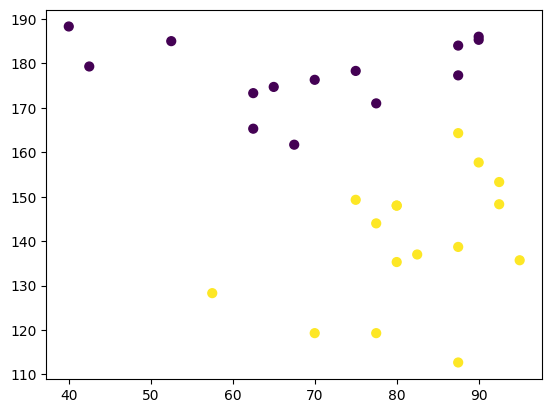

In [ ]:
from sklearn.mixture import GaussianMixture as GMM
gmm_model = GMM(n_components=2,covariance_type='full')

X = np.array(encoded_data)[:,:2]
gmm_model.fit(X)
labels = gmm_model.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
plt.show()

Recordemos que GMM es un método suave de clustering.

Podemos obtener las probabilidades de pertenencia de las observaciones a cada uno de los clusters.

In [ ]:
probs = np.round(gmm_model.predict_proba(X), 2)
probs

array([[1.  , 0.  ],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.72, 0.28],
       [0.  , 1.  ],
       [0.04, 0.96],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.97, 0.03],
       [0.92, 0.08],
       [0.99, 0.01],
       [0.32, 0.68],
       [0.97, 0.03],
       [0.99, 0.01],
       [0.96, 0.04],
       [0.96, 0.04],
       [0.9 , 0.1 ],
       [0.  , 1.  ]])

<ipython-input-25-83328ce6230e>:18: MatplotlibDeprecationWarning:

Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.



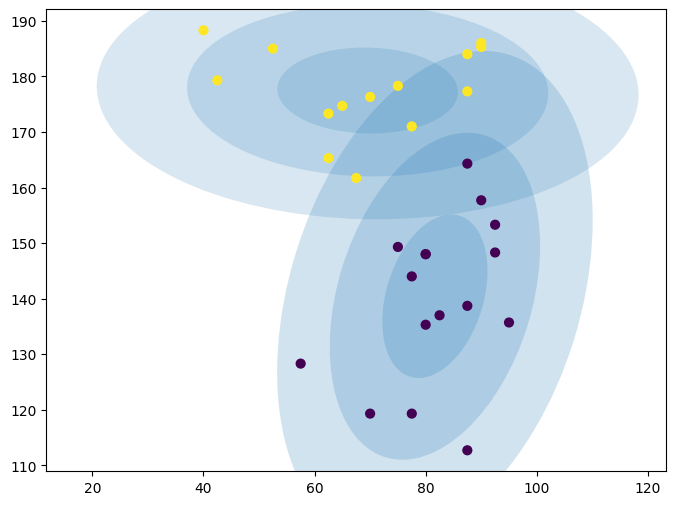

In [ ]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_[:2], gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

    plt.show()

X = np.array(encoded_data)[:,:2]  # model with Time and SUS (first 2 columns)
gmm_model = GMM(n_components=2, random_state=42)
fig, ax = plt.subplots(figsize=(8, 6))
plot_gmm(gmm_model, X, ax=ax)

### Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

El Clustering Basado en Densidad se refiere a métodos de aprendizaje no supervisado que identifican grupos o clústeres distintivos en los datos, basándose en la idea de que un clúster en el espacio de datos es una región contigua de alta densidad de puntos, separada de otros clústeres similares por regiones contiguas de baja densidad de puntos.

Density-Based Spatial Clustering of Applications with Noise (DBSCAN) es un algoritmo base para el clustering basado en densidad. Puede descubrir clústeres de diferentes formas y tamaños a partir de una gran cantidad de datos, que pueden contener ruido y valores atípicos.

**Conceptos clave de DBSCAN**

DBSCAN es un algoritmo de agrupación basado en densidad que identifica clústeres en un conjunto de datos, tomando en cuenta la densidad local de los puntos.

1. **Vecindad de un Punto $p$:**
   - Sea $N_{\varepsilon}(p)$ el conjunto de puntos dentro de un radio $\varepsilon$ de $p$.
   - $N_{\varepsilon}(p) = \{q \mid \text{distancia}(p, q) \leq \varepsilon\}$.

2. **Punto Central (Núcleo):**
   - Un punto $p$ se considera un "punto central" si hay al menos $MinPts$ puntos en su vecindad $N_{\varepsilon}(p)$.

3. **Punto de Borde:**
   - Un punto $q$ se considera un "punto de borde" si está en la vecindad $N_{\varepsilon}(p)$ de un punto central $p$, pero no es central.

4. **Punto de Ruido:**
   - Un punto que no es central ni de borde se considera un "punto de ruido".

5. **Conexión Directa:**
   - Dos puntos $p$ y $q$ se consideran "directamente conexos" si $q \in N_{\varepsilon}(p)$ o viceversa.

6. **Conjunto Densamente Conectado:**
   - Un conjunto de puntos está "densamente conectado" si cada punto del conjunto es directamente conexo con cada otro punto del conjunto.

7. **Componente Densamente Conectada:**
   - Una "componente densamente conectada" es un conjunto máximo de puntos mutuamente densamente conectados.

8. **Algoritmo DBSCAN:**
   - Para cada punto $p$ en el conjunto de datos:
     - Si $p$ no ha sido visitado:
       - Si $p$ es un punto central, se forma una nueva componente densamente conectada.
       - Si $p$ es un punto de borde, se asigna al mismo componente que su punto central.
       - Si $p$ es un punto de ruido, se ignora.
   - El proceso se repite hasta que todos los puntos han sido visitados.

En resumen, DBSCAN agrupa puntos en componentes densamente conectadas, identificando puntos centrales y puntos de borde basándose en la densidad local. Puntos no asignados forman la categoría de ruido.

![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/dbscan_ani.gif)

**Estimación de Parámetros:**

Toda tarea de minería de datos tiene el problema de los (hiper)parámetros de los algoritmos. Cada parámetro influye en el algoritmo de maneras específicas. Para DBSCAN, se necesitan los parámetros $ \varepsilon $ y `minPts`.

- **`minPts`:** Como regla general, se puede derivar un mínimo `minPts` a partir del número de dimensiones $ D $ en el conjunto de datos, como $ \text{minPts} \geq D + 1 $. El valor bajo $ \text{minPts} = 1 $ no tiene sentido, ya que entonces cada punto por sí mismo ya será un clúster. Por lo tanto, $ \text{minPts} $ debe elegirse al menos como 3. Sin embargo, valores más grandes suelen ser mejores para conjuntos de datos con ruido y producirán clústeres más significativos. Como regla general, se puede utilizar $ \text{minPts} = 2 \cdot \text{dim} $, pero puede ser necesario elegir valores más grandes para conjuntos de datos muy grandes, para datos ruidosos o para datos que contienen muchos duplicados.

- **$ \varepsilon $:** El valor para $ \varepsilon $ puede elegirse utilizando un grafo de distancia $ k $, trazando la distancia al $ k = \text{minPts} - 1 $ vecino más cercano ordenado de mayor a menor valor. Buenos valores de $ \varepsilon $ son aquellos donde esta trama muestra un "codo": si $ \varepsilon $ se elige demasiado pequeño, una gran parte de los datos no se agrupará; mientras que para un valor de $ \varepsilon $ demasiado alto, los clústeres se fusionarán y la mayoría de los objetos estarán en el mismo clúster. En general, se prefieren valores pequeños de $ \varepsilon $ y, como regla general, solo una pequeña fracción de puntos debería estar dentro de esta distancia entre sí.

- **Función de Distancia:** La elección de la función de distancia está estrechamente vinculada a la elección de $ \varepsilon $ y tiene un impacto importante en los resultados. En general, será necesario identificar primero una medida razonable de similitud para el conjunto de datos antes de que se pueda elegir el parámetro $ \varepsilon $. No hay una estimación para este parámetro, pero las funciones de distancia deben elegirse apropiadamente para el conjunto de datos.

![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/DBSCAN-Illustration.svg.png)

In [ ]:
from sklearn.cluster import DBSCAN

X = np.array(encoded_data)

dbscan=DBSCAN()

dbscan.fit(X)  # model with all data

dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

### Método para determinar el valor óptimo de $\varepsilon$

El método consiste en calcular las distancias k-vecinas más cercanas en una matriz de puntos.

La idea es calcular el promedio de las distancias de cada punto a sus $k$ vecinos más cercanos. El valor de $k$ será especificado por el usuario y corresponde a MinPts.

A continuación, estas k-distancias se representan gráficamente en orden ascendente. El objetivo es determinar el "codo" que corresponde al parámetro $\varepsilon$ óptimo.

Un $\varepsilon$ corresponde a un valor umbral donde ocurre un cambio brusco a lo largo de la curva de k-distancias.

La función `kNNdistplot()` de Python se puede utilizar para dibujar el gráfico de k-distancias:

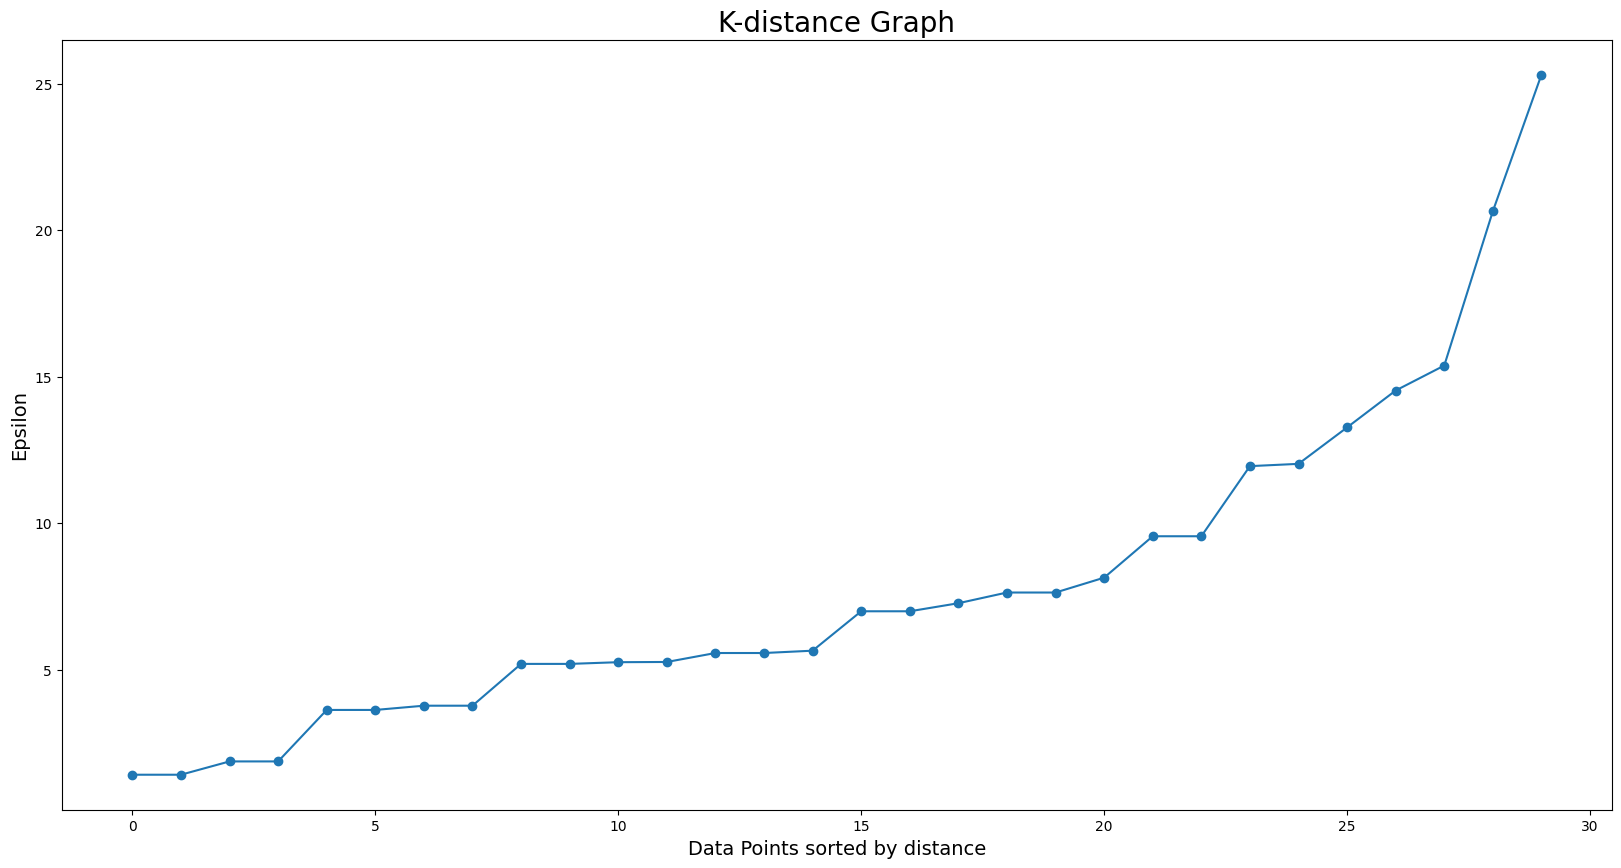

In [ ]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances, '-o')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

La línea de código `dbscan_opt = DBSCAN(eps=15, min_samples=4)` crea una instancia de la clase DBSCAN con parámetros específicos. Aquí está una explicación de los parámetros utilizados:

- `eps=15`: Este parámetro establece la distancia máxima entre dos puntos para que uno sea considerado en el vecindario del otro. En este caso, se ha fijado en 15 unidades, lo que significa que dos puntos estarán en el mismo vecindario si su distancia euclidiana es menor o igual a 15.

- `min_samples=4`: Este parámetro establece el número mínimo de puntos que deben estar dentro del vecindario de un punto para que se considere un punto central. En este caso, se ha fijado en 4, lo que significa que un punto se considerará central si hay al menos 4 puntos (incluyendo él mismo) en su vecindario.
Si `min_samples` se establece en un valor alto, DBSCAN encontrará clústeres más densos, mientras que si se establece en un valor bajo, los clústeres encontrados serán más dispersos.

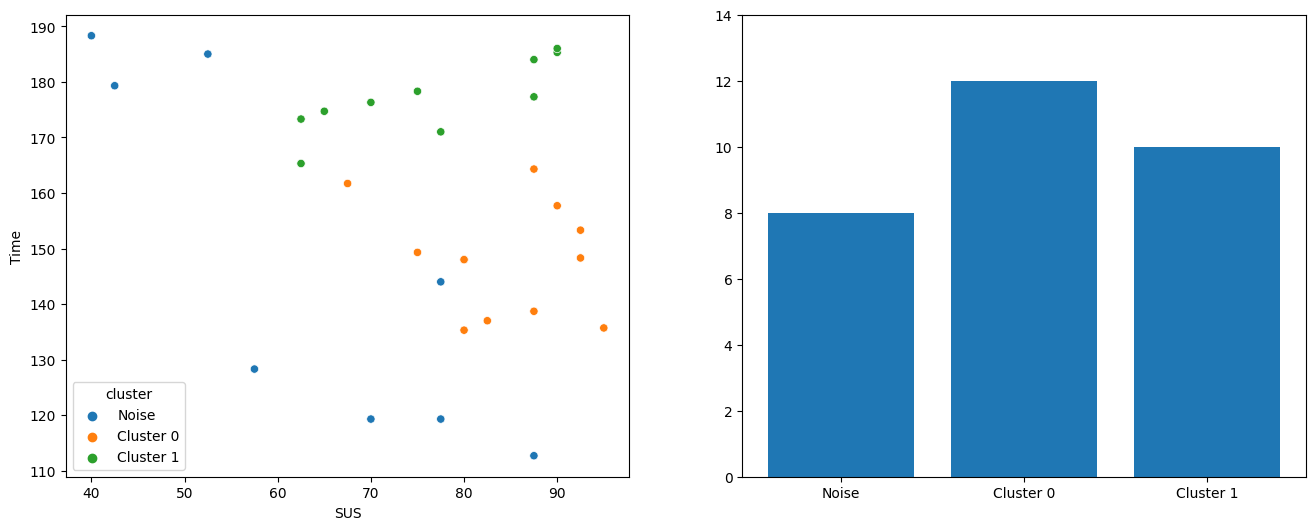

array([-1,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1,  0,  0,  0, -1, -1, -1,
       -1, -1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1, -1])

In [ ]:
dbscan_opt = DBSCAN(eps=15, min_samples=4)
dbscan_opt.fit(X)  # model with all data

results = pd.DataFrame({'SUS': X[:, 0], 'Time': X[:, 1], 'cluster': dbscan_opt.labels_})
cluster_mapping = {-1: "Noise", 0: "Cluster 0", 1: "Cluster 1"}
results.cluster = results.cluster.map(cluster_mapping)

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.scatterplot(data=results,
                x='SUS',
                y='Time',
                hue='cluster',
                legend=True
                )
plt.subplot(1,2,2)
plt.bar(*np.unique(dbscan_opt.labels_, return_counts=True))
plt.xticks([-1, 0, 1], ['Noise', 'Cluster 0', 'Cluster 1'])
plt.yticks(range(0,15,2))
plt.show()

dbscan_opt.labels_

In [ ]:
X = np.array(encoded_data)  # model with all data
gmm_model.fit(X)
labels = gmm_model.predict(X)

# En el sisguiente dataset vamos a colocar las etiquetas resultantes de los diferentes métodos
data_cl = data.copy()
data_cl['Kmeans'] = kmeans.labels_.astype('str')
data_cl['Kmodes'] = kmodes.labels_.astype('str')
data_cl['gmm'] = labels.astype('str')
data_cl['dbscan'] = dbscan_opt.labels_.astype('str')

### Clustering jerárquico

El clustering jerárquico se basa en la creación de una jerarquía de agrupamientos en la que los datos se organizan en una estructura de árbol. Sea $X$ el conjunto de datos, el proceso de agrupamiento jerárquico puede ser representado matemáticamente de la siguiente manera:

1. **Agrupamiento Aglomerativo:**
   - Inicialización: Cada punto $x_i \in X$ se considera como un clúster individual $C_i$.
   - Iterativamente, se fusionan los clústeres más cercanos basándose en alguna medida de distancia o disimilitud entre clústeres. Esto se repite hasta que todos los puntos están en un solo clúster o en el número deseado de clústeres.

   $$ C_i = \{x_i\} \quad \text{para todo} \quad x_i \in X $$

   $$ C_i \leftarrow \text{Fusión de } C_i \text{ y } C_j \quad \text{donde} \quad i, j = \arg \min \text{dist}(C_i, C_j) $$

2. **Agrupamiento Divisivo:**
   - Inicialización: Todos los puntos $X$ se consideran como un único clúster $C$.
   - Iterativamente, se dividen los clústeres basándose en alguna medida de distancia o disimilitud entre puntos dentro del clúster. Esto se repite hasta que cada punto está en su propio clúster o en el número deseado de clústeres.

   $$ C = X $$

   $$ C_i, C_j \leftarrow \text{División de } C \text{ en } C_i \text{ y } C_j \quad \text{donde} \quad i, j = \arg \max \text{dist}(x_i, x_j) $$

En ambos casos, la distancia o disimilitud entre puntos o clústeres ($\text{dist}$) juega un papel crucial y puede variar según la medida utilizada, como la distancia euclidiana, la distancia de Manhattan o alguna otra medida definida por el usuario. El resultado final es un dendrograma que representa la jerarquía de agrupamientos.


### Agrupamiento Aglomerativo

**Función linkage:**

En clustering jerárquico, la función de enlace (linkage) se utiliza para calcular la distancia entre clústeres durante el proceso de aglomeración. La distancia determina cómo se fusionan los clústeres y qué tan similares deben ser para considerarse para la fusión. Hay varios métodos de enlace comúnmente utilizados, y aquí se describen algunos de ellos:

Supongamos que tienes dos clústeres $ A $ y $ B $ con puntos $ x $ e $ y $ respectivamente.

1. **Enlace Completo (Complete Linkage):**
   $$ d(A, B) = \max(\text{dist}(x, y)) $$
   La distancia entre dos clústeres es la máxima distancia entre sus puntos más alejados.

2. **Enlace Simple (Single Linkage):**
   $$ d(A, B) = \min(\text{dist}(x, y)) $$
   La distancia entre dos clústeres es la mínima distancia entre sus puntos más cercanos.

3. **Enlace Promedio (Average Linkage):**
   $$ d(A, B) = \frac{1}{n_A \cdot n_B} \sum_{i \in A} \sum_{j \in B} \text{dist}(x_i, y_j) $$
   La distancia entre dos clústeres es el promedio de todas las distancias entre sus puntos.

4. **Enlace de Ward (Ward's Linkage):**
   Utiliza la varianza para decidir qué clústeres fusionar y minimiza la varianza dentro de los clústeres después de la fusión.

Estas son las definiciones matemáticas básicas de algunos métodos de enlace comunes. En estas fórmulas, $ \text{dist}(x, y) $ representa la distancia entre dos puntos $ x $ e $ y $, y $ n_A $ y $ n_B $ son los tamaños de los clústeres $ A $ y $ B $, respectivamente. Estas fórmulas son utilizadas para calcular la distancia entre clústeres durante cada paso del proceso de aglomeración en el clustering jerárquico.

- Representación esquemática de clustering jerárquico aglomerativo:

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/jerarquico_cl.png" alt="" width="800"/>

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

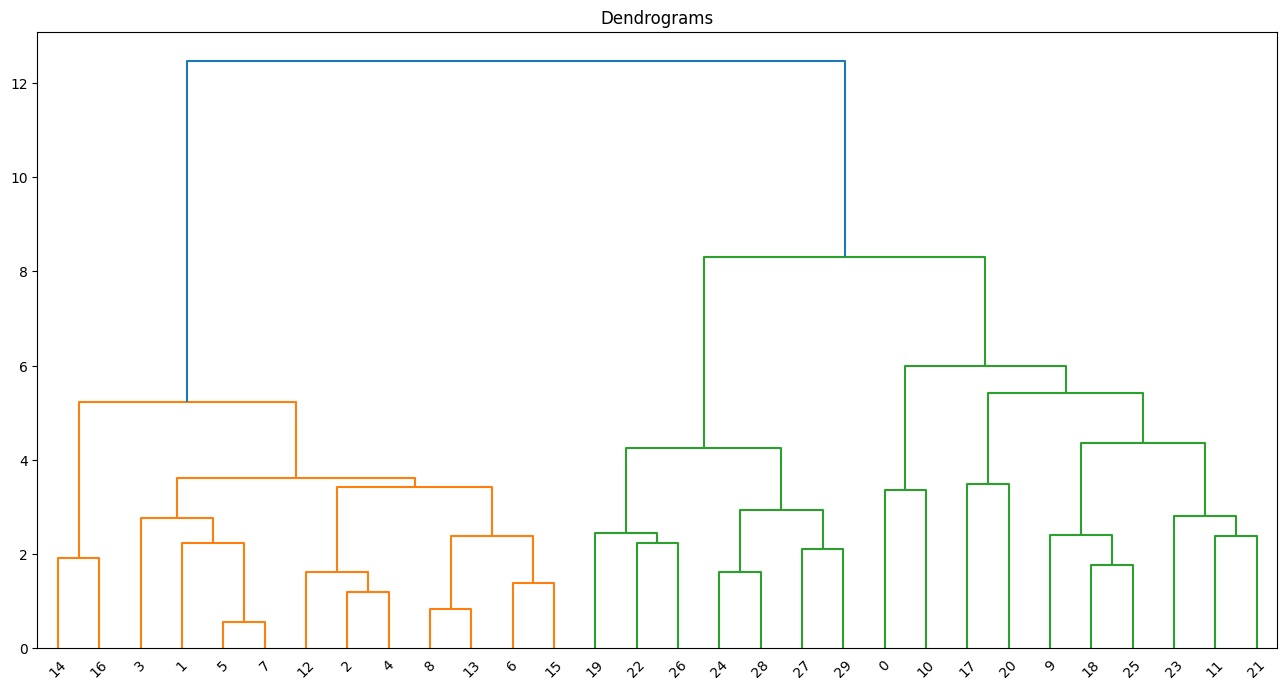

In [ ]:
Z = shc.linkage(data_scaled, method='ward')

plt.figure(figsize=(16, 8))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.show()

In [ ]:
import ipywidgets

def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')

    return ddata

d = [10, 7.5, 5.75, 5.325]

@ipywidgets.interact
def plot(Clusters=[2, 3, 4, 5]):
    cluster = AgglomerativeClustering(n_clusters=Clusters, metric='euclidean', linkage='ward')
    labels = cluster.fit_predict(data_scaled)
    print(np.unique(labels, return_counts=True))

    plt.figure(figsize=(12, 8))
    fancy_dendrogram(
        Z,
        truncate_mode='lastp',
        p=12,
        leaf_rotation=90.,
        leaf_font_size=12.,
        show_contracted=True,
        annotate_above=10,
        max_d=d[Clusters-2],
    );
    plt.show()

interactive(children=(Dropdown(description='Clusters', options=(2, 3, 4, 5), value=2), Output()), _dom_classes…

In [ ]:
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
labels = cluster.fit_predict(data_scaled)
data_cl['agglomerative'] = labels.astype('str')

all_data ={'data_clusters': data_cl}

data_cl

,SUS,Time,ID,Gender,Age,Kinect,NUI,Games,Kmeans,Kmodes,gmm,dbscan,agglomerative
0,42.5,179.3,student,M,twenty,high,average,high,1,1,1,-1,0
1,92.5,153.3,student,M,twenty,high,high,high,1,1,0,0,1
2,95.0,135.7,student,M,twenty,average,average,high,1,1,0,0,1
3,92.5,148.3,student,F,twenty,average,high,high,1,1,0,0,1
4,80.0,148.0,student,M,twenty,average,average,high,1,1,0,0,1
5,87.5,138.7,student,M,twenty,average,high,high,1,1,0,0,1
6,75.0,149.3,student,M,twenty,average,average,average,1,1,0,0,1
7,80.0,135.3,student,M,twenty,average,high,high,1,1,0,0,1
8,80.0,148.0,student,M,twenty,average,high,average,1,1,0,0,1
9,65.0,174.7,employee,F,forty,average,high,none,0,0,1,1,0


In [ ]:
from viz import *

plot_data(all_data)

interactive(children=(Dropdown(description='ds', options=('data_clusters',), value='data_clusters'), Dropdown(…

### Variables importantes (Feature importance)

- ¿Qué variables son importantes?

Una vez asignadas las etiquetas usando una técnica de clustering podemos
realizar un análsis de características importantes para entender cómo fueron modelados nuestros clusters. Ahora nuestro problema es supervisado, donde la variable a modelar es la etiqueta dada por el cluster.

**Importancia de características**

La "importancia de características" (feature importance) se refiere a una medida que evalúa la contribución de cada característica o variable en un modelo de aprendizaje automático para hacer predicciones. Esta medida ayuda a comprender cuánto impacto tiene cada característica en la capacidad del modelo para realizar predicciones precisas.

Existen varias formas de calcular la importancia de características, y la elección de la técnica puede depender del tipo de modelo utilizado. Algunas de las formas comunes de medir la importancia de características incluyen:

1. **Importancia basada en árboles:**
   - En modelos de árboles de decisión y ensambles de árboles (como Random Forest o Gradient Boosting), la importancia de características se puede calcular según la cantidad de veces que una característica se utiliza para dividir los nodos en los árboles y la mejora resultante en la pureza o precisión del modelo.

2. **Importancia basada en coeficientes:**
   - En modelos lineales, como la regresión lineal o la regresión logística, la importancia de características se puede determinar según los coeficientes asignados a cada característica. Características con coeficientes más grandes tienen una mayor influencia en las predicciones del modelo.

3. **Importancia basada en permutaciones:**
   - Esta técnica implica permutar aleatoriamente los valores de una característica y medir el impacto resultante en el rendimiento del modelo. La disminución en el rendimiento después de la permutación indica la importancia de esa característica.

La importancia de características es valiosa para la interpretación del modelo y la toma de decisiones. Puede ayudar a identificar las variables más influyentes, destacar posibles problemas de multicolinealidad o sobreajuste, y simplificar el modelo al seleccionar las características más relevantes.

**PCA**

Aunque PCA no está diseñado específicamente para resaltar "variables importantes", puede proporcionar información valiosa sobre la estructura y las relaciones dentro de un conjunto de datos.

PCA proporciona una representación compacta y no correlacionada de los datos, lo que puede ayudar a entender las estructuras subyacentes y resaltar las variables que más contribuyen a la varianza en el conjunto de datos.

Vea el notebook: https://nbviewer.org/github/marsgr6/EN-online/blob/main/dimensionality_reduction.ipynb

**Un biplot** en el contexto de Análisis de Componentes Principales (PCA) es una representación gráfica que combina la información de las proyecciones de los puntos de datos y las direcciones de las variables originales en el espacio de los componentes principales. Aquí hay una guía básica sobre cómo interpretar un biplot en PCA:

1. **Puntos de Datos:**
   - Cada punto en el biplot representa una observación o un caso en el conjunto de datos original. La posición de un punto en el biplot está determinada por sus coordenadas en el espacio de los componentes principales.

2. **Direcciones de las Variables Originales:**
   - Las flechas en el biplot representan las direcciones de las variables originales en el espacio de los componentes principales. **La longitud y la dirección de cada flecha indican la contribución y la dirección de máxima variabilidad de cada variable en los componentes principales.**

  - Variables con flechas largas: Contribuyen significativamente a la variabilidad en los datos y son consideradas como importantes en términos de su impacto en los componentes principales.

  - Variables con flechas cortas: Tienen una contribución menor a la variabilidad y pueden considerarse como menos importantes en el contexto de PCA.

  - Esta interpretación es valiosa al seleccionar las características más relevantes o al intentar comprender qué variables están impulsando la estructura de los datos en el espacio de componentes principales.

3. **Proximidad entre Puntos y Flechas:**
   - La proximidad de un punto a una flecha indica la relación entre la observación y la variable correspondiente. Si un punto está cerca de una flecha, significa que esa observación tiene un alto valor en esa variable. Si un punto y una flecha tienen una orientación similar, sugiere que hay una relación positiva entre la variable y la observación.

4. **Correlación entre Variables:**
   - La correlación entre dos variables puede ser inferida por el ángulo entre las flechas correspondientes en el biplot. Un ángulo pequeño sugiere una correlación positiva, mientras que un ángulo cercano a 180 grados sugiere una correlación negativa.

5. **Concentración de Varianza:**
   - La concentración de puntos en ciertas direcciones del biplot indica la cantidad de varianza capturada por esos componentes principales. Las direcciones con más puntos indican las direcciones de mayor variabilidad en los datos.

6. **Identificación de Grupos:**
   - Si hay grupos o patrones en los datos, es posible que los puntos de esos grupos estén cerca unos de otros y tengan orientaciones similares en relación con las flechas de las variables.

El biplot en PCA proporciona una representación visual intuitiva de las relaciones entre las observaciones y las variables en el espacio de los componentes principales. Es una herramienta valiosa para interpretar la estructura de los datos y para identificar patrones, correlaciones y contribuciones relativas de las variables a la variabilidad en los datos.

[pca] >Extracting column labels from dataframe.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca] >Plot PC1 vs PC2 with loadings.


[scatterd] >INFO> Create scatterplot


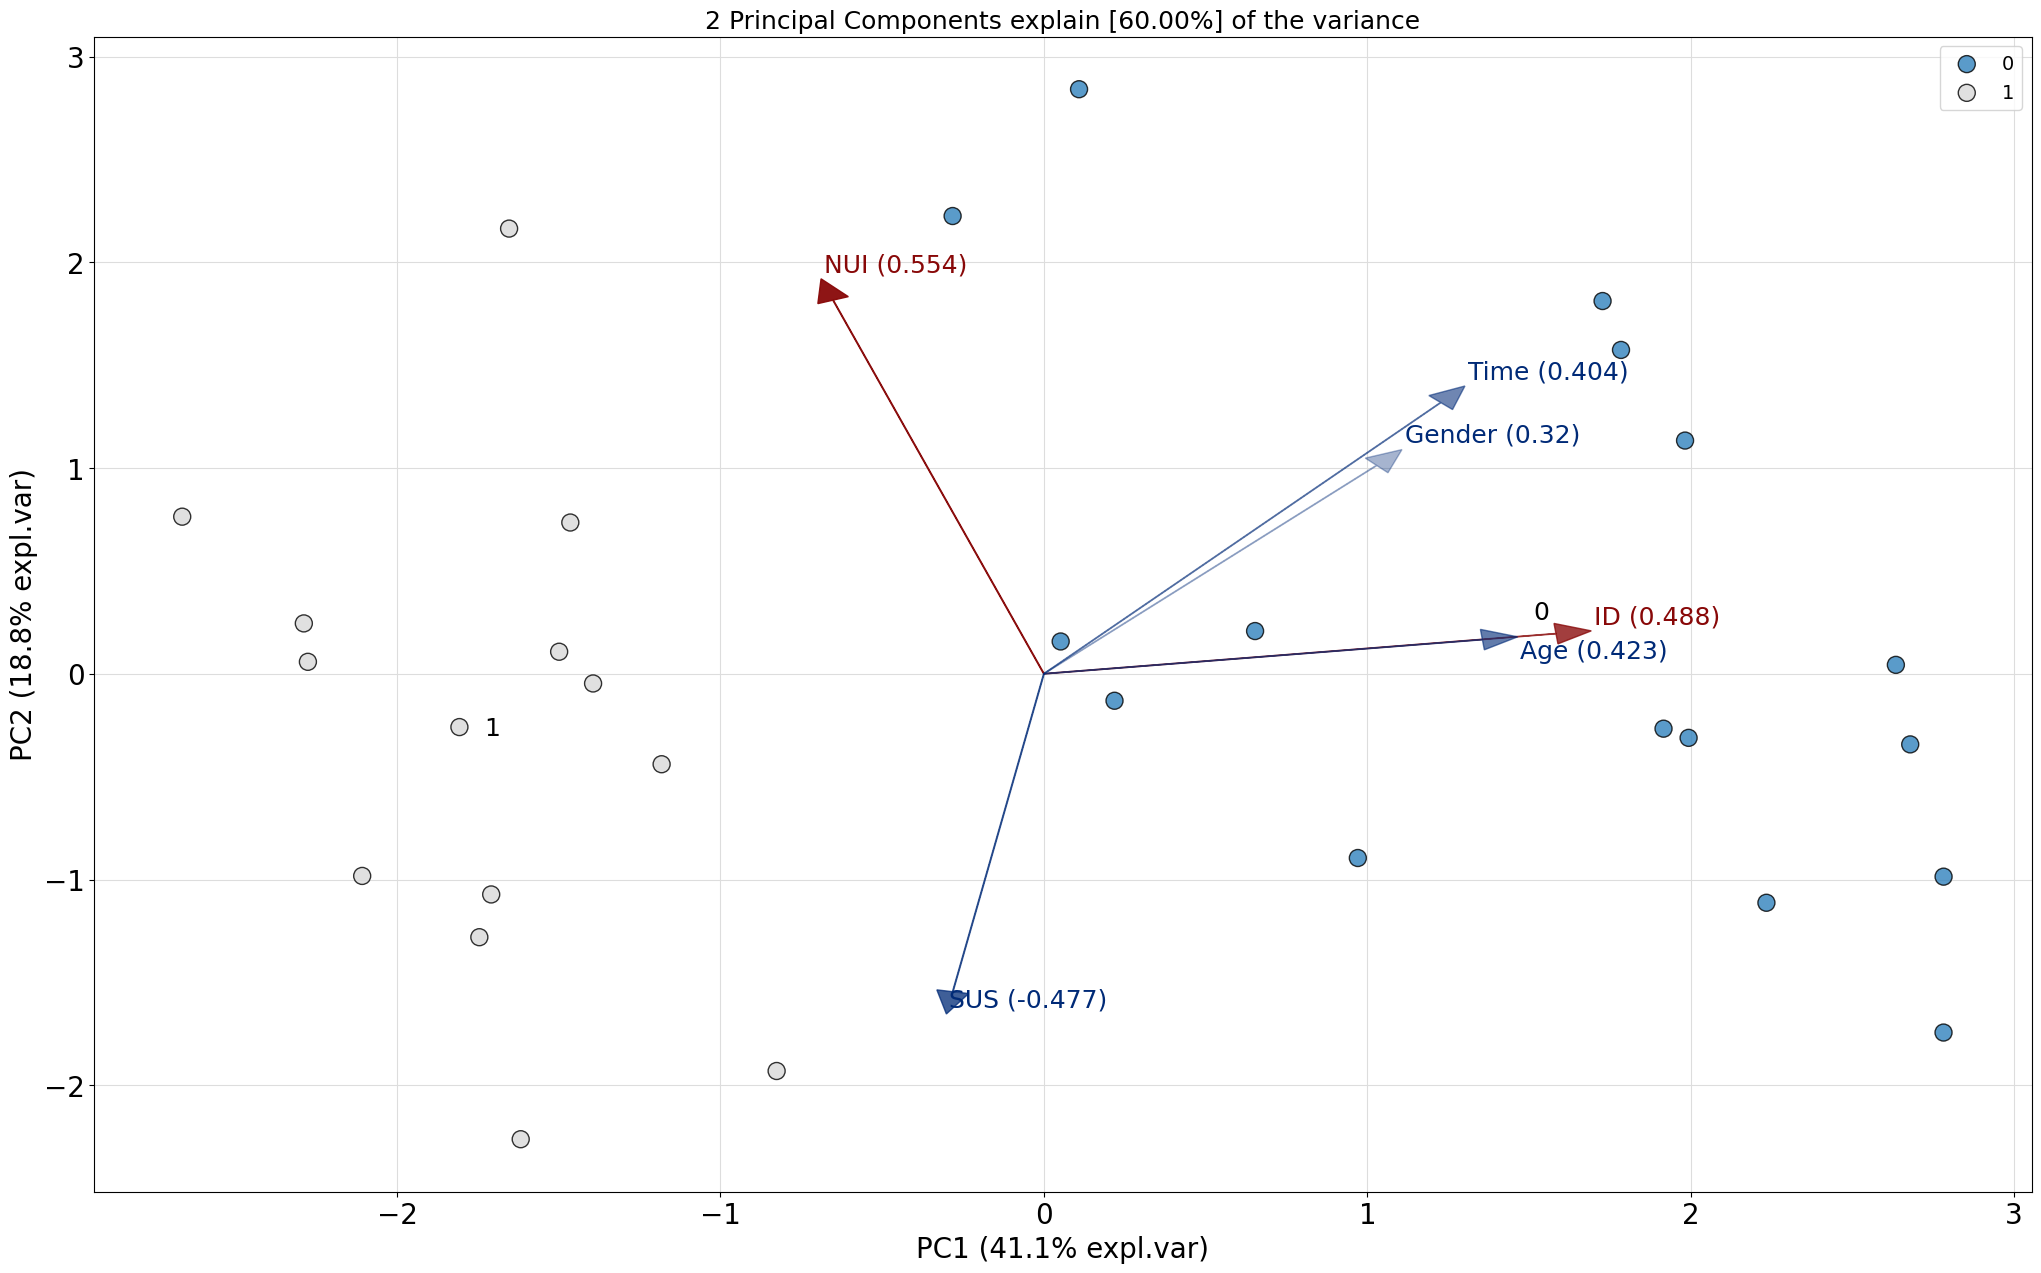

In [ ]:
from pca import pca

model = pca(n_components=2)

# Fit and transform
results = model.fit_transform(X=pd.DataFrame(data_scaled, columns=data.columns), row_labels=data_cl.Kmeans)

# Plot the explained variance
#fig, ax = model.plot()
#plt.show()
# Scatter the first two PCs
#fig, ax = model.scatter()
#plt.show()

# Create a biplot
fig, ax = model.biplot(n_feat=6)
plt.show()

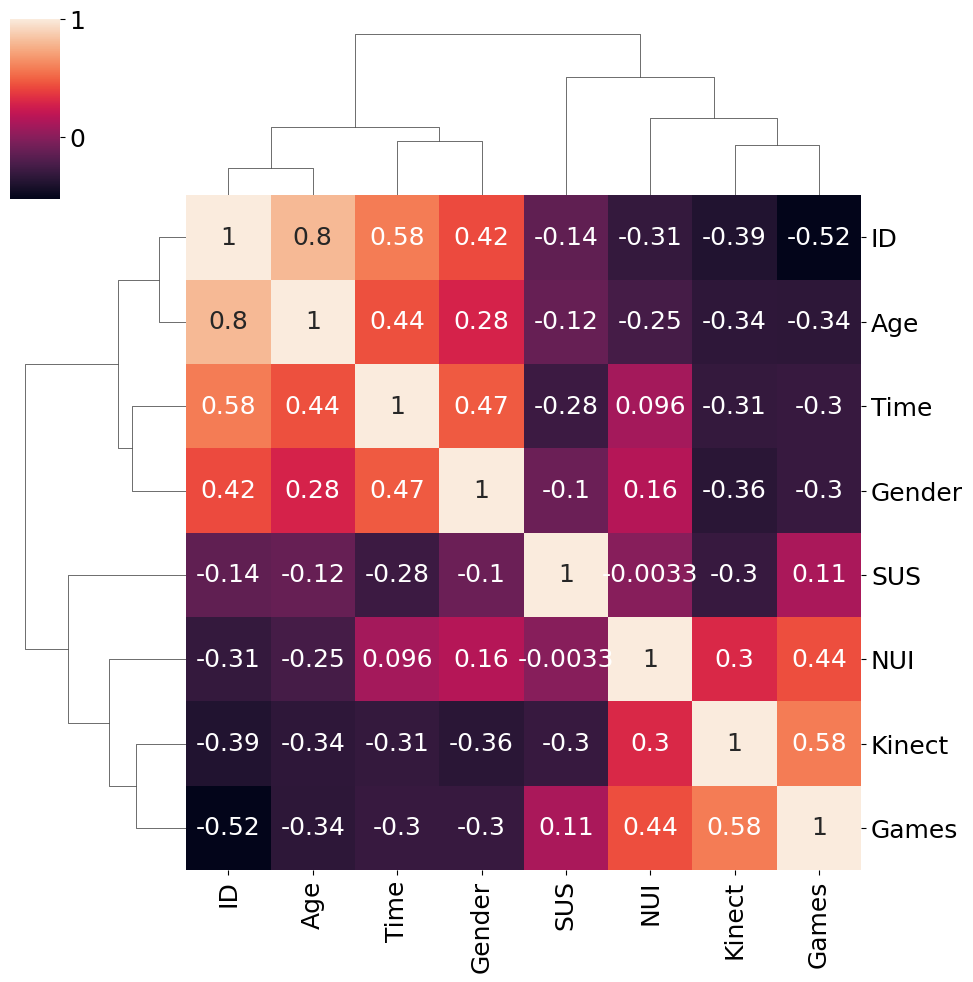

In [ ]:
sns.clustermap(encoded_data.corr(), annot=True)
plt.show()

### Random Forest para obtener la Importancia de Características

Random Forest (Bosque Aleatorio) es un algoritmo de aprendizaje automático que pertenece a la categoría de ensambles, específicamente, a los ensambles de árboles de decisión. La idea central detrás de Random Forest es construir múltiples árboles de decisión durante el entrenamiento y combinar sus predicciones para obtener un resultado más robusto y preciso.

Aquí hay una descripción básica de cómo funciona Random Forest:

1. **Construcción de Múltiples Árboles:**
   - Se crean varios árboles de decisión durante el entrenamiento, cada uno basado en una muestra aleatoria del conjunto de datos (bootstrap) y utilizando un subconjunto aleatorio de las características para dividir los nodos.

2. **Votación por Mayoría o Promedio:**
   - Para realizar predicciones, cada árbol en el bosque emite su propia predicción. En el caso de clasificación, se realiza una votación por mayoría para determinar la clase final, y en el caso de regresión, se realiza un promedio de las predicciones de los árboles.

3. **Bootstrap y Muestreo de Características:**
   - El uso de bootstrap (muestreo con reemplazo) y la selección aleatoria de características ayuda a introducir variabilidad en cada árbol, lo que mejora la generalización y la robustez del modelo.

4. **Reducción de la Correlación entre Árboles:**
   - Dado que cada árbol se construye en una muestra diferente y utiliza un conjunto diferente de características para tomar decisiones, los árboles en el bosque son menos propensos a estar altamente correlacionados entre sí.

5. **Manejo de Datos No Balanceados:**
   - Random Forest tiende a manejar bien conjuntos de datos no balanceados y es menos propenso al sobreajuste en comparación con un solo árbol de decisión.

6. **Importancia de Características:**
   - Random Forest proporciona una medida de la importancia de cada característica en el proceso de toma de decisiones, lo que puede ser útil para la interpretación del modelo.

Random Forest se utiliza comúnmente en tareas de clasificación y regresión y ha demostrado ser efectivo en una variedad de dominios. Su capacidad para manejar conjuntos de datos grandes y complejos, así como su resistencia al sobreajuste, lo convierten en una opción popular en la práctica del aprendizaje automático.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = encoded_data[encoded_data.columns]
y = kmeans.labels_  # Usaremos las etiquetas dadas por Kmeans

rf = RandomForestClassifier(n_estimators=100, random_state=123)
# cambiar valores de acuerdo al numero de columnas en el dataset
rf.fit(X, y)

RandomForestClassifier(random_state=123)

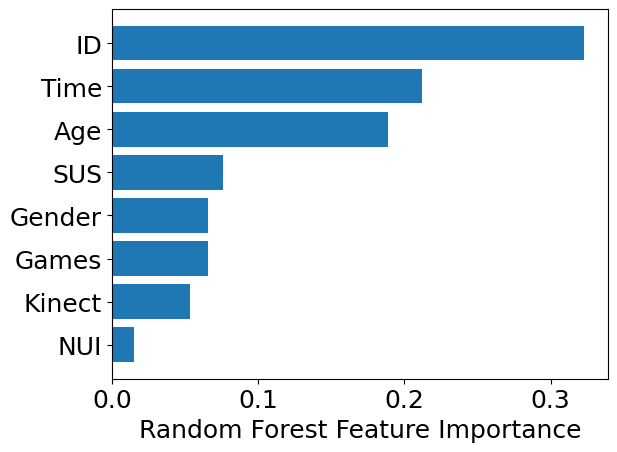

In [ ]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx][:], rf.feature_importances_[sorted_idx][:])
plt.xlabel("Random Forest Feature Importance")
plt.show()

### Sources and resources

- https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/
https://jakevdp.github.io/PythonDataScienceHandbook/index.html
- https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
- https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html